## Load Libs

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch 
import torchvision
from PIL import Image
import json
import datetime

## Preprocess images from folder to numpy object

In [2]:
import os

# data sets folder directory
data_dir = "/Users/Lisa/Desktop/Master Thesis/RoofNet"
# name of the folder (train/val/test) ALWAYS CHANGE FOR A NEW DATASET
data_type = "train"
img_dir = data_dir+"/" + data_type+"/"
imgs = {}
def read_image_pil(path):
    img = Image.open(path)
    o_img = img.copy()
    # chnage accrodingly to 64x64 etc.
    img = img.crop((64,0,448,384))
    # setting the size of the image to 64x64 pixels
    img.thumbnail((64, 64), Image.ANTIALIAS)
    img = np.array(img)#[:32,:]
    # take rgb instead of rgba
    img = img[:,:,:3]
    return o_img,img


for subdir, dirs, _ in os.walk(img_dir):
    for d in dirs:
        paths = subdir + d + '/'
        metajson = paths+'metadata.json'
        with open(metajson) as f:
            meta = json.load(f)
            #issue = meta['reroof_permit_issue_date']
            #expiration = meta['reroof_permit_expiration_date']
            address = meta['address']
            trans_year = meta['new_roof_year']
            if trans_year == None:
                trans_year = 0
            key = hash(address)
        trans_file = paths+"/transition.txt" 
        #if os.path.isfile(trans_file):
        #    trans_year = int(open(trans_file).read())
        #else:
        #    trans_year = 0
        #imgs[address]={'imgs':[],'years':[],'issue':[],'expiration':[],'address':[],'trans_year':[]}
        imgs[address]={'imgs':[],'years':[],'address':[],'trans_year':[]}
        print('address',address)
        for _, _, files in os.walk(paths):
            for i,file in enumerate(files):
                if 'png' in file:
                    print('loading',i,file)
                    _,img = read_image_pil(paths + file)
                    imgs[address]['years'].append(int(file[:-4]))
                    imgs[address]['imgs'].append(img)
                    #imgs[address]['issue']= issue
                    #imgs[address]['expiration'] = expiration
                    imgs[address]['address'] = address
                    imgs[address]['trans_year'] = int(trans_year)
            
    if '' in imgs:
        del imgs['']


address 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 1301 N Vermont Ave, Los Angeles, CA 90027, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 3636 Gateway Center Ave, San Diego, CA 92102, USA
loading 0 2017.png
loading 1 2016.png


/var/folders/6r/r5dfhtxd75g2p4pkybxl8jcc0000gn/T/ipykernel_33691/522290687.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((64, 64), Image.ANTIALIAS)


loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 6020 Progressive Ave, San Diego, CA 92154, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 8701 S St Andrews Pl, Los Angeles, CA 90047, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 4196 Marlton Ave, Los Angeles, CA 90008, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 5909 W 3rd St, Los Angeles, CA 90036, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.png
loading 7 2018.png
address 1822 Main St, San Diego, CA 92113, USA
loading 0 2017.png
loading 1 2016.png
loading 2 2014.png
loading 3 2015.png
loading 5 2012.png
loading 6 2013.p

## Save and load

In [3]:
imgs = {'data':imgs}
name = data_type.replace('/','_')
name += '_64_noreroofs'

# file_path added to save in the preprocessed_data folder
file_path = '/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/preprocessed_data/' + name
np.save(file_path,imgs)

In [4]:
# add your path to the created before npy file FOR THE VAE and Binary Classifierg
# dataset = np.load('/Users/Lisa/Desktop/Master Thesis/data/' + 'labeled_dataset.npy',allow_pickle=True)

dataset = np.load('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/preprocessed_data/train_64_noreroofs.npy', allow_pickle=True)
dataset = dataset.item().get('data')
print(dataset) 

{'6800 S Avalon Blvd, Los Angeles, CA 90003, USA': {'imgs': [array([[[130, 142, 122],
        [133, 143, 122],
        [138, 146, 127],
        ...,
        [ 68,  84,  57],
        [ 76,  88,  62],
        [ 52,  66,  38]],

       [[126, 139, 118],
        [133, 144, 122],
        [135, 142, 122],
        ...,
        [ 69,  82,  54],
        [ 87,  97,  70],
        [ 93, 104,  76]],

       [[129, 140, 121],
        [138, 148, 130],
        [137, 147, 129],
        ...,
        [ 97, 111,  82],
        [ 92, 104,  76],
        [ 86,  94,  68]],

       ...,

       [[116, 128, 111],
        [115, 124, 110],
        [115, 122, 111],
        ...,
        [ 64,  66,  59],
        [ 49,  48,  42],
        [ 13,   8,   5]],

       [[111, 123, 100],
        [106, 116,  96],
        [105, 113,  96],
        ...,
        [105, 110,  96],
        [ 52,  53,  48],
        [  0,   0,   0]],

       [[120, 129, 106],
        [115, 123, 103],
        [111, 117,  98],
        ...,
        [107,

In [ ]:
import sys
sys.path.append("/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/roofnet/utils")
from data import ImageDataset

In [ ]:
# from roofnet.utils.data import ImageDataset, TripletBuildingSampler
from torchvision.transforms import transforms 

data_file_path = '/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/preprocessed_data/train_64_triplet.npy'
data = ImageDataset(data_file_path, 
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ]))


NameError: name 'ImageDataset' is not defined

In [34]:
from datetime import datetime
from torchvision.utils import make_grid

#sampler = TripletBuildingSampler(data,batch_size=1)
loader = torch.utils.data.DataLoader(data,batch_size=7)
loader = iter(loader)


img shape: [3, 64, 64] 
img year: 2012 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
img shape: [3, 64, 64] 
img year: 2013 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
img shape: [3, 64, 64] 
img year: 2014 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
img shape: [3, 64, 64] 
img year: 2015 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
img shape: [3, 64, 64] 
img year: 2016 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
img shape: [3, 64, 64] 
img year: 2017 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA
img shape: [3, 64, 64] 
img year: 2018 
transition year: 2018 
address: 6800 S Avalon Blvd, Los Angeles, CA 90003, USA


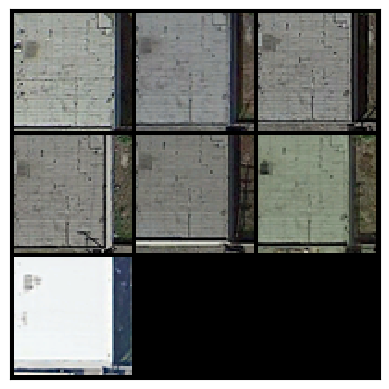

In [35]:
x,y,meta = next(loader)
for i in range(len(y)):
    print('='*20)
    print('img shape:',[n for n in x[i].shape],'\nimg year:',y[i].item(),'\ntransition year:',meta['transition_year'][i].item(),'\naddress:',meta['address'][i])
    
def display_image_grid(x,nrow=8):
    x = (x.cpu().detach()+1.0)*0.5
    x = make_grid(x,nrow=nrow)
    x = x.numpy()
    fig = plt.imshow(np.transpose(x, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
    
display_image_grid(x[:len(y),:,:,:],nrow=3)
